In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
print("24BAD056")
print("kalvi kannan b")

24BAD056
kalvi kannan b


In [ ]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['clean_message'] = df['message'].apply(clean_text)

In [34]:
df['label_encoded'] = df['label'].map({'ham': 0, 'spam': 1})

In [35]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_message'])
y = df['label_encoded']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
nb = MultinomialNB(alpha=1.0)   # Laplace smoothing
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.968609865470852
Precision: 1.0
Recall: 0.7666666666666667
F1 Score: 0.8679245283018868
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



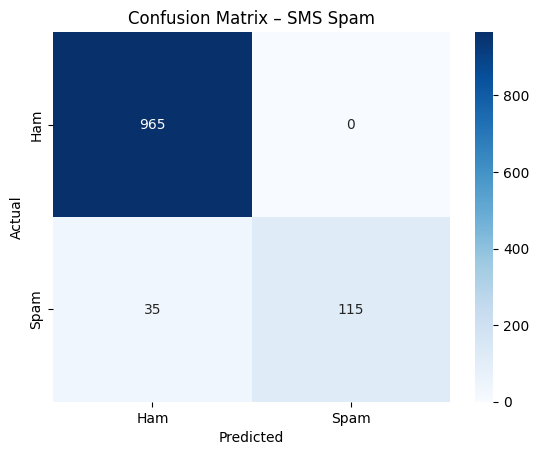

In [37]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – SMS Spam")
plt.show()


In [38]:
misclassified = df.iloc[y_test.index][y_test != y_pred]
misclassified.head()

,label,message,clean_message,label_encoded
1044,spam,We know someone who you know that fancies you....,we know someone who you know that fancies you ...,1
683,spam,Hi I'm sue. I am 20 years old and work as a la...,hi im sue i am years old and work as a lapdan...,1
4071,spam,Loans for any purpose even if you have Bad Cre...,loans for any purpose even if you have bad cre...,1
2312,spam,tddnewsletter@emc1.co.uk (More games from TheD...,tddnewsletteremccouk more games from thedailyd...,1
3979,spam,ringtoneking 84484,ringtoneking,1


In [39]:
feature_names = vectorizer.get_feature_names_out()
spam_prob = nb.feature_log_prob_[1]

top_spam =np.argsort(spam_prob)[-10:]

print("Top words influencing spam:")
for i in top_spam:
    print(feature_names[i])

Top words influencing spam:
reply
won
text
ur
stop
prize
mobile
claim
txt
free


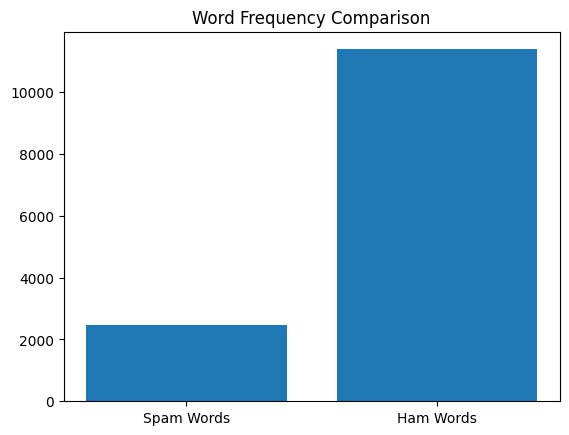

In [40]:
spam_words = X[np.array(y==1)].sum(axis=0)
ham_words = X[np.array(y==0)].sum(axis=0)

plt.bar(["Spam Words","Ham Words"],
        [spam_words.sum(), ham_words.sum()])
plt.title("Word Frequency Comparison")
plt.show()